In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## *Loading the CDC dataset into Pandas Dataframe*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path ='/content/drive/MyDrive/Nutrition_Physical_Activity__and_Obesity_Behavioral_Risk_Factor_Surveillance_System.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


## Summary of the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

## Keeping only the essential data columns

In [ ]:
df = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ', 'Total', 'Data_Value_Alt', 'YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);
df = df.drop(['GeoLocation', 'Question', 'StratificationCategory1', 'Stratification1', 'Gender'],1)

<ipython-input-11-af4968d13d2a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ', 'Total', 'Data_Value_Alt', 'YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);
<ipython-input-11-af4968d13d2a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['GeoLocation', 'Question', 'StratificationCategory1', 'Stratification1', 'Gender'],1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       53392 non-null  int64  
 1   LocationAbbr    53392 non-null  object 
 2   LocationDesc    53392 non-null  object 
 3   Data_Value      48346 non-null  float64
 4   Sample_Size     48346 non-null  float64
 5   Age(years)      11438 non-null  object 
 6   Education       7628 non-null   object 
 7   Income          13349 non-null  object 
 8   Race/Ethnicity  15256 non-null  object 
 9   LocationID      53392 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.1+ MB


In [ ]:
df.dtypes

YearStart           int64
LocationAbbr       object
LocationDesc       object
Data_Value        float64
Sample_Size       float64
Age(years)         object
Education          object
Income             object
Race/Ethnicity     object
LocationID          int64
dtype: object

In [ ]:
df.isna()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,Age(years),Education,Income,Race/Ethnicity,LocationID
0,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,True,True,True,True,False
2,False,False,False,False,False,True,True,True,True,False
3,False,False,False,False,False,True,False,True,True,False
4,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
53387,False,False,False,True,True,True,True,True,False,False
53388,False,False,False,True,True,True,True,True,False,False
53389,False,False,False,True,True,True,True,True,False,False
53390,False,False,False,True,True,True,True,True,False,False


## Remove Outliers

In [ ]:
#Using Interquartile Function
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

In [ ]:
remove_outliers(df)
df

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,Age(years),Education,Income,Race/Ethnicity,LocationID
1,2011,AL,Alabama,32.3,2581.0,NaN,NaN,NaN,NaN,1
2,2011,AL,Alabama,31.8,4723.0,NaN,NaN,NaN,NaN,1
3,2011,AL,Alabama,33.6,1153.0,NaN,Less than high school,NaN,NaN,1
4,2011,AL,Alabama,32.8,2402.0,NaN,High school graduate,NaN,NaN,1
5,2011,AL,Alabama,33.8,1925.0,NaN,Some college or technical school,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
53387,2016,VI,Virgin Islands,NaN,NaN,NaN,NaN,NaN,Asian,78
53388,2016,VI,Virgin Islands,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,78
53389,2016,VI,Virgin Islands,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native,78
53390,2016,VI,Virgin Islands,NaN,NaN,NaN,NaN,NaN,2 or more races,78


##Checking for any missing values in high amount in columns

In [ ]:
missing = df.isnull().sum() * 100 / len(df)
missing

YearStart          0.000000
LocationAbbr       0.000000
LocationDesc       0.000000
Data_Value        10.539948
Sample_Size       10.539948
Age(years)        77.238642
Education         85.303394
Income            73.236554
Race/Ethnicity    71.074674
LocationID         0.000000
dtype: float64

In [ ]:
#Dropping the age column
df = df.drop(['Age(years)'],1)

<ipython-input-19-d26393642a18>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Age(years)'],1)


##Splitting data based on qualitative (categorical) and quantitative (numerical) values

In [ ]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical = df[numerical_columns]
numerical

,YearStart,Data_Value,Sample_Size,LocationID
1,2011,32.3,2581.0,1
2,2011,31.8,4723.0,1
3,2011,33.6,1153.0,1
4,2011,32.8,2402.0,1
5,2011,33.8,1925.0,1
...,...,...,...,...
53387,2016,NaN,NaN,78
53388,2016,NaN,NaN,78
53389,2016,NaN,NaN,78
53390,2016,NaN,NaN,78


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical = df[categorical_columns]
categorical

,LocationAbbr,LocationDesc,Education,Income,Race/Ethnicity
1,AL,Alabama,NaN,NaN,NaN
2,AL,Alabama,NaN,NaN,NaN
3,AL,Alabama,Less than high school,NaN,NaN
4,AL,Alabama,High school graduate,NaN,NaN
5,AL,Alabama,Some college or technical school,NaN,NaN
...,...,...,...,...,...
53387,VI,Virgin Islands,NaN,NaN,Asian
53388,VI,Virgin Islands,NaN,NaN,Hawaiian/Pacific Islander
53389,VI,Virgin Islands,NaN,NaN,American Indian/Alaska Native
53390,VI,Virgin Islands,NaN,NaN,2 or more races


In [ ]:
#Dropping the income column
df = df.drop(['Income'],1)

<ipython-input-22-68e5b86db37e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Income'],1)


##Plotting distributions of numerical data

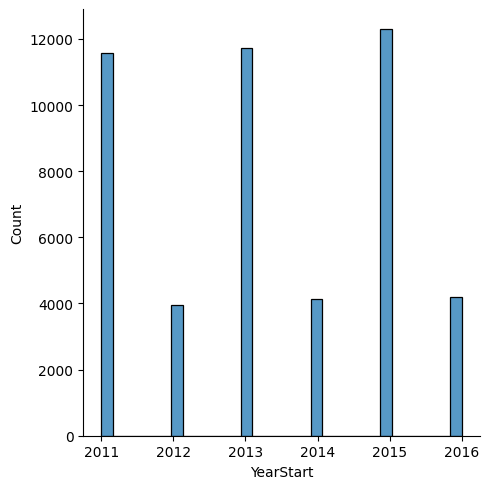

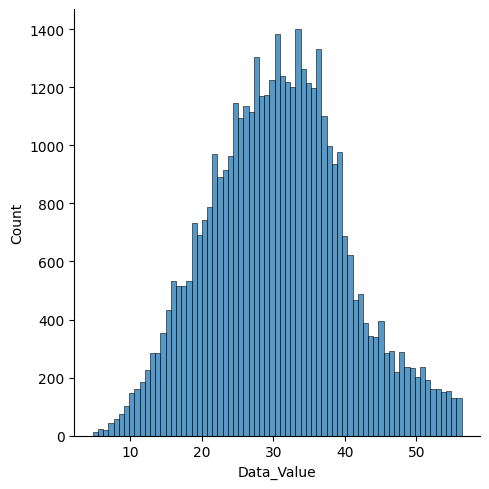

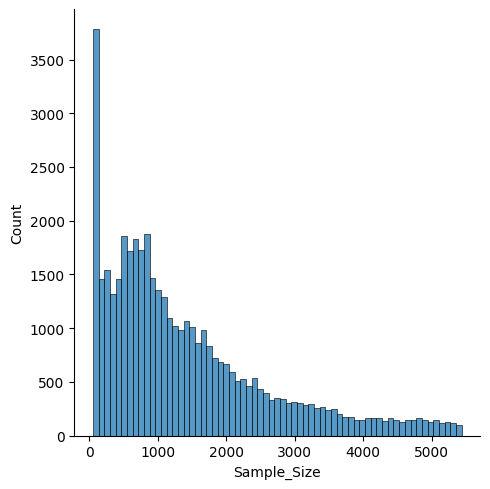

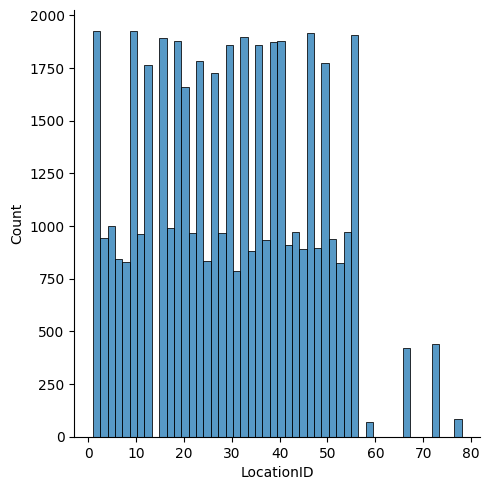

In [ ]:
for col in numerical.columns:
    sns.displot(numerical[col])
    plt.show()

In [ ]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47875 entries, 1 to 53391
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YearStart    47875 non-null  int64  
 1   Data_Value   42829 non-null  float64
 2   Sample_Size  42829 non-null  float64
 3   LocationID   47875 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.8 MB


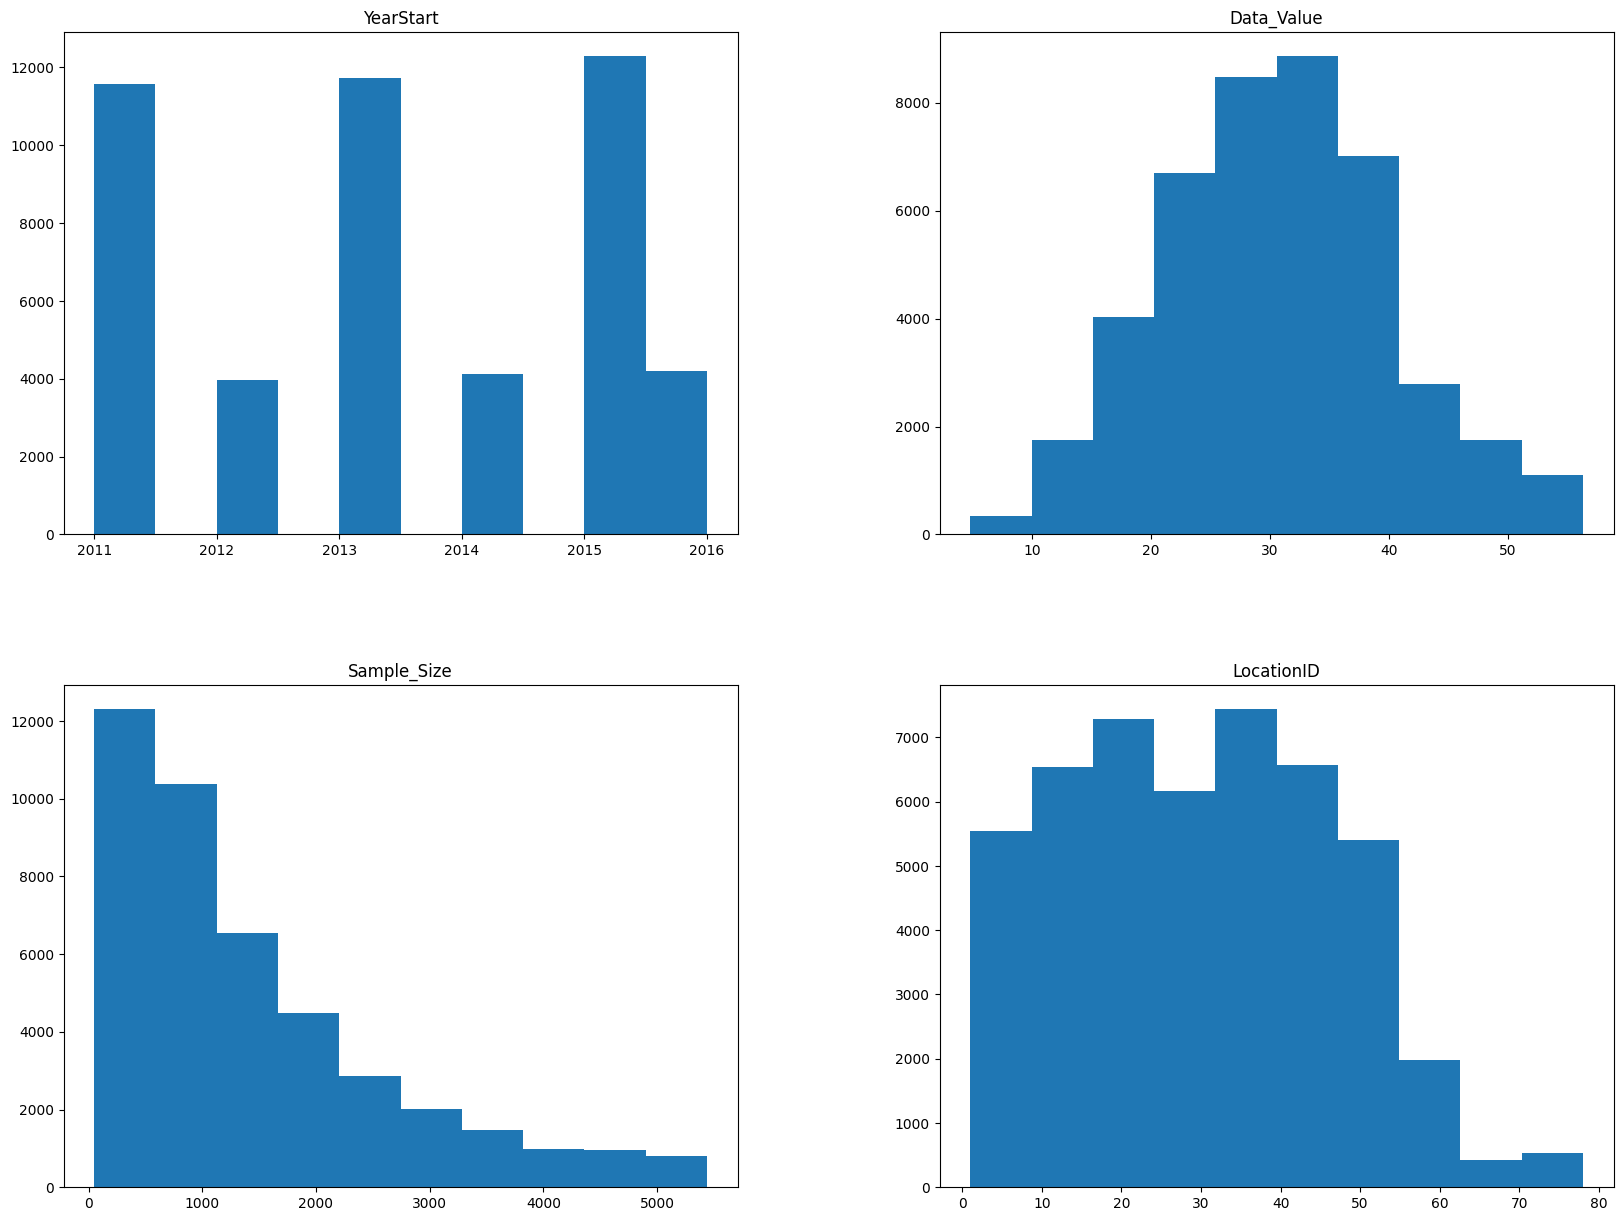

In [ ]:
numerical.hist(figsize=(20,15), grid=False)
plt.show()

## Plotting relationships between numerical variables

In [ ]:
#Checking correlation between numerical variables
numerical.corr()

,YearStart,Data_Value,Sample_Size,LocationID
YearStart,1.000000,0.004871,-0.042571,0.047854
Data_Value,0.004871,1.000000,-0.023037,0.000900
Sample_Size,-0.042571,-0.023037,1.000000,-0.001713
LocationID,0.047854,0.000900,-0.001713,1.000000


<Axes: >

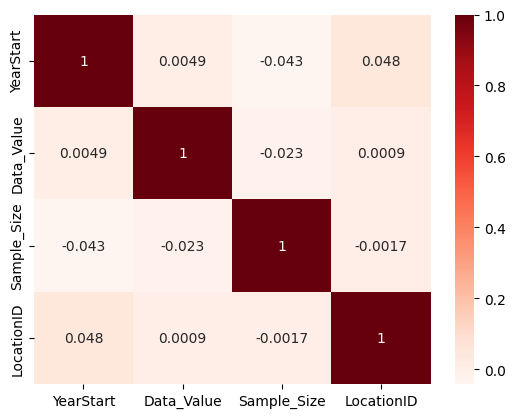

In [ ]:
corr = numerical.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True, cmap='Reds')

## X/Y Split

In [ ]:
X = df[['YearStart','Education', 'LocationID']]
y = numerical['Data_Value']

## Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,YearStart,Education,LocationID
9485,2014,NaN,17
47656,2015,NaN,38
47716,2015,NaN,39
